# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the the python functionality at hand

## Library import

In [1]:
from report_manager import project, analysisResult
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

/Users/albertosantos/miniconda3/envs/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning:

R object inheriting from "POSIXct" but without attribute "tzone".

Using TensorFlow backend.
/Users/albertosantos/miniconda3/envs/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning:

R object inheriting from "POSIXct" but without attribute "tzone".



## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [2]:
p = project.Project('P0000001', datasets={}, report={})

In [3]:
p.build_project()

In [4]:
p.generate_report()

Multiclass ['Healthy' 'NAFLD+NGT' 'T2DM' 'NAFLD+T2DM' 'Cirrhosis'] 48
ANOVA 3.4074010848999023
Correlation 0.01908397674560547
Ranking 0.057794809341430664
Multiclass ['Cirrhosis' 'Healthy' 'NAFLD+NGT' 'NAFLD+T2DM' 'T2DM'] 48
perm= 1
perm= 2
perm= 3
perm= 4
perm= 5
perm= 6
perm= 7
perm= 8
perm= 9
perm= 10
perm= 11
perm= 12
perm= 13
perm= 14
perm= 15
perm= 16
perm= 17
perm= 18
perm= 19
perm= 20
perm= 21
perm= 22
perm= 23
perm= 24
perm= 25
perm= 26
perm= 27
perm= 28
perm= 29
perm= 30
perm= 31
perm= 32
perm= 33
perm= 34
perm= 35
perm= 36
perm= 37
perm= 38
perm= 39
perm= 40
perm= 41
perm= 42
perm= 43
perm= 44
perm= 45
perm= 46
perm= 47
perm= 48
perm= 49
perm= 50
perm= 51
perm= 52
perm= 53
perm= 54
perm= 55
perm= 56
perm= 57
perm= 58
perm= 59
perm= 60
perm= 61
perm= 62
perm= 63
perm= 64
perm= 65
perm= 66
perm= 67
perm= 68
perm= 69
perm= 70
perm= 71
perm= 72
perm= 73
perm= 74
perm= 75
perm= 76
perm= 77
perm= 78
perm= 79
perm= 80
perm= 81
perm= 82
perm= 83
perm= 84
perm= 85
perm= 86
perm= 87


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albertosantos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enrichment 3.43003511428833
Enrichment 4.238492012023926
   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k.  max.k.
1      1    0.754 -6.34         0.9180 76.50000  7.40e+01 113.000
2      2    0.780 -4.21         0.8040 15.60000  1.42e+01  33.200
3      3    0.935 -3.15         0.9560  4.12000  3.44e+00  12.700
4      4    0.929 -2.69         0.9330  1.31000  9.80e-01   5.850
5      5    0.897 -2.38         0.8850  0.48900  3.09e-01   3.150
6      6    0.230 -3.01         0.0102  0.21000  1.08e-01   1.880
7      7    0.868 -1.83         0.8310  0.10400  3.99e-02   1.370
8      8    0.349 -3.69         0.2770  0.05780  1.59e-02   1.230
9      9    0.403 -4.40         0.2820  0.03620  6.57e-03   1.140
10    10    0.301 -3.43         0.1220  0.02490  2.81e-03   1.080
11    11    0.285 -3.23         0.1640  0.01860  1.25e-03   1.030
12    12    0.290 -2.99         0.1650  0.01480  5.64e-04   0.986
13    13    0.265 -2.70         0.3190  0.01230  2.57e-04   0.953
14    14    0.188 -

ValueError: DataFrame index must be unique for orient='index'.

In [ ]:
p.datasets['multiomics'].data

In [6]:
import pandas as pd
import networkx as nx
pkn = p.datasets['proteomics'].generate_knowledge()
ckn = p.datasets['clinical'].generate_knowledge()
pkn.generate_knowledge_graph()
ckn.generate_knowledge_graph()

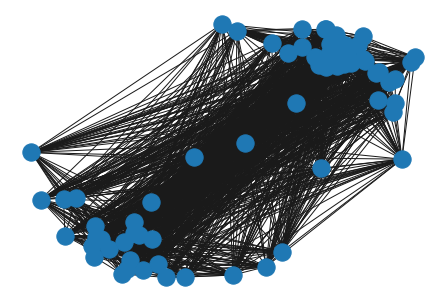

In [7]:
nx.draw(pkn.graph)

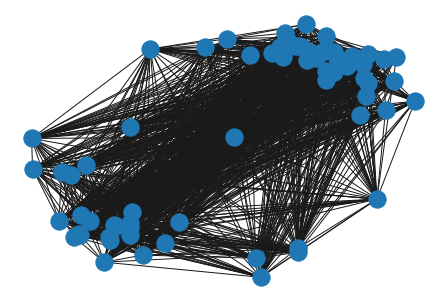

In [8]:

nx.draw(nx.compose(pkn.graph,ckn.graph))

## Visualizing the Project report

In [8]:
plots = p.show_report("notebook")

AttributeError: 'Cytoscape' object has no attribute 'figure'

## Access to datasets

### Clinical data

In [4]:
clin_dataset = p.get_dataset('clinical').get_dataset('processed')
clin_dataset.head()

,subject,biological_sample,Age,Alanine aminotransferase measurement,Alkaline phosphatase measurement,Aspartate aminotransferase measurement,Bilirubin level,Body height,Body mass index,Diastole,...,Hemoglobin A1c measurement,High density lipoprotein measurement,Low density lipoprotein cholesterol measurement,Systole,Triglycerides measurement,VLDL cholesterol measurement,Waist circumference,Weight (property) (qualifier value),platelets/liter,group
0,S30,BS30,73.0,24.0,54.0,30.0,15.0,182.0,27.774423,83.0,...,6.3,1.26,2.1,157.0,0.58,0.3,108.0,92.0,227.0,Healthy
1,S31,BS31,49.0,27.0,27.0,28.0,17.0,177.0,28.727377,95.0,...,5.8,1.70,4.3,134.0,1.24,0.6,108.0,90.0,261.0,Healthy
2,S32,BS32,66.0,18.0,69.0,21.0,9.0,158.0,28.841532,97.0,...,6.2,1.12,4.1,143.0,1.12,0.5,90.0,72.0,228.0,Healthy
3,S33,BS33,61.0,22.0,101.0,26.0,12.0,165.0,42.056933,93.0,...,6.2,0.91,4.8,141.0,2.20,1.0,134.0,114.5,306.0,Healthy
4,S34,BS34,44.0,18.0,61.0,25.0,8.0,182.0,29.434851,76.0,...,5.4,1.21,3.9,123.0,0.90,0.4,102.0,97.5,377.0,Healthy


#### Further dataset manipulation and visualization

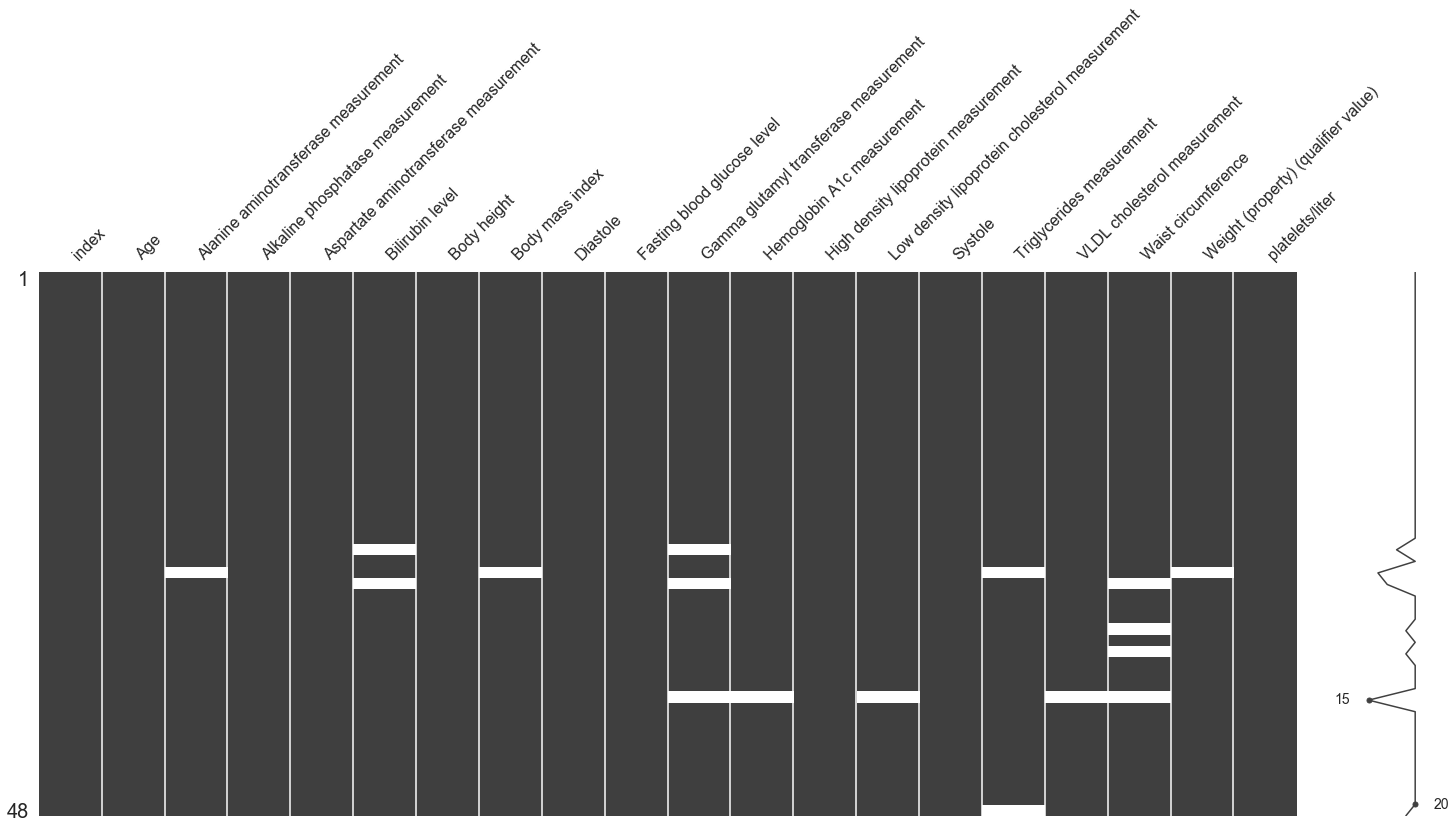

In [5]:
clin_dataset = clin_dataset.reset_index().set_index('subject').drop(['group', 'biological_sample'], axis=1)#.pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)


### Proteomics dataset (original)

In [22]:
dataset = p.get_dataset("proteomics").get_dataset("dataset")

In [41]:
dataset.head()

,LFQ_intensity,group,identifier,name,sample,subject
0,23.798378,Cirrhosis,Q9ULI3,HEG1,AS69,S69
1,26.851147,Cirrhosis,Q9UNW1,MINPP1,AS69,S69
2,25.672685,Cirrhosis,S6BAM6,,AS69,S69
3,23.807840,Cirrhosis,Q9Y490,TLN1,AS69,S69
4,22.567643,Cirrhosis,Q9UNN8,PROCR,AS69,S69


In [25]:
proteomics = p.get_dataset("proteomics").get_dataset("processed")

In [27]:
proteomics

identifier,group,sample,CDH5-P33151,IGKV2-29-A2NJV5,NCAM1-P13591,GGH-Q92820,-P0DOX3,TUBB-P07437,-B2R5G8,APOC4-APOC2-K7ER74,...,EXT2-Q93063,APOC4-A5YAK2,MINPP1-Q9UNW1,PAPLN-O95428,-A2NB45,HSPA8-P11142,NID1-P14543,TGOLN2-O43493,-B2R701,COMP-G3XAP6
subject,,,,,,,,,,,,,,,,,,,,,
S68,Cirrhosis,AS68,27.019774,29.948377,27.445849,24.993690,32.042606,24.318517,28.380720,31.200052,...,20.903892,26.155705,25.423550,22.823474,26.662978,24.927085,23.336744,28.465100,27.307824,23.862309
S69,Cirrhosis,AS69,26.845535,29.969511,26.521886,24.845415,27.440156,23.209851,28.594201,31.610257,...,23.841726,19.948365,26.851147,21.334562,26.066344,22.854362,23.206412,28.457427,28.265037,25.158000
S70,Cirrhosis,AS70,26.443274,29.457246,26.349337,24.765015,29.020251,22.698227,29.033570,31.426624,...,20.534920,25.476394,26.506467,22.547173,26.373251,25.218264,23.417487,28.881016,27.532151,24.415296
S71,Cirrhosis,AS71,27.060542,29.871045,26.307807,24.987108,29.378528,23.170967,27.239551,30.931498,...,21.447531,19.840490,26.066538,22.091380,26.422861,24.316273,23.096642,27.563547,28.556218,25.919253
S72,Cirrhosis,AS72,26.212228,31.565154,25.697952,24.986109,32.720491,23.346149,28.300861,30.837783,...,23.870795,21.797507,26.505847,23.664823,26.670742,24.335166,23.708657,28.130671,28.104096,24.419312
S73,Cirrhosis,AS73,27.023057,29.778093,25.632757,24.491305,29.225201,23.692322,26.993727,31.172777,...,19.742108,21.833763,27.036811,22.090616,26.445779,25.257504,24.252775,28.166099,29.071094,25.512317
S74,Cirrhosis,AS74,26.629509,29.269124,26.007123,24.483761,30.122381,23.413091,28.189381,31.353844,...,23.403999,24.061669,26.352859,21.840538,26.441176,24.355147,23.287764,28.285326,28.202471,24.931569
S75,Cirrhosis,AS75,26.603994,26.356317,27.032441,24.854385,27.926092,22.897094,27.695378,31.596638,...,24.302779,22.298343,26.870522,20.357249,26.970268,25.756845,23.256811,28.071778,27.925068,25.267371
S76,Cirrhosis,AS76,26.298415,29.918690,26.348223,24.655275,29.770599,23.475237,28.328562,32.456061,...,20.169839,25.407464,26.532150,21.652143,27.112075,25.569847,23.452996,27.484077,27.897353,24.798674


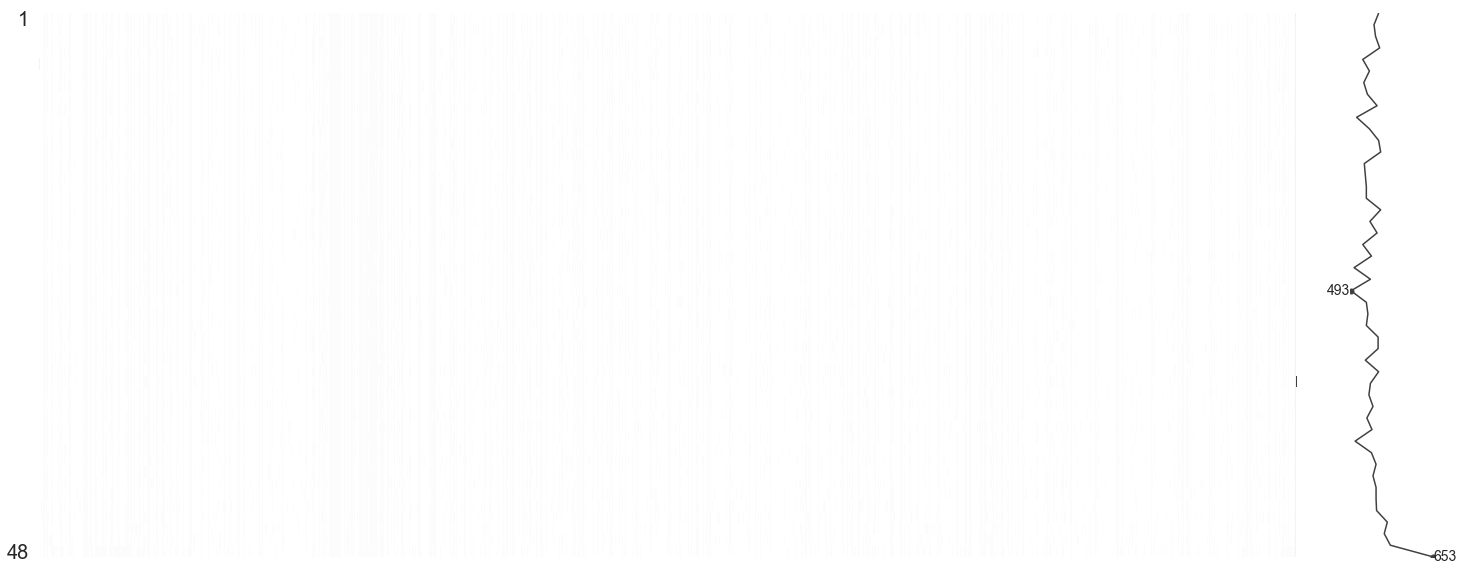

In [8]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

In [9]:
preprocessed_dataset = p.get_dataset('clinical').get_dataset('processed')
preprocessed_dataset.head()

,subject,biological_sample,Age,Alanine aminotransferase measurement,Alkaline phosphatase measurement,Aspartate aminotransferase measurement,Bilirubin level,Body height,Body mass index,Diastole,...,Hemoglobin A1c measurement,High density lipoprotein measurement,Low density lipoprotein cholesterol measurement,Systole,Triglycerides measurement,VLDL cholesterol measurement,Waist circumference,Weight (property) (qualifier value),platelets/liter,group
0,S30,BS30,73.0,24.0,54.0,30.0,15.0,182.0,27.774423,83.0,...,6.3,1.26,2.1,157.0,0.58,0.3,108.0,92.0,227.0,Healthy
1,S31,BS31,49.0,27.0,27.0,28.0,17.0,177.0,28.727377,95.0,...,5.8,1.70,4.3,134.0,1.24,0.6,108.0,90.0,261.0,Healthy
2,S32,BS32,66.0,18.0,69.0,21.0,9.0,158.0,28.841532,97.0,...,6.2,1.12,4.1,143.0,1.12,0.5,90.0,72.0,228.0,Healthy
3,S33,BS33,61.0,22.0,101.0,26.0,12.0,165.0,42.056933,93.0,...,6.2,0.91,4.8,141.0,2.20,1.0,134.0,114.5,306.0,Healthy
4,S34,BS34,44.0,18.0,61.0,25.0,8.0,182.0,29.434851,76.0,...,5.4,1.21,3.9,123.0,0.90,0.4,102.0,97.5,377.0,Healthy


### Proteomics dataset (imputed)

In [10]:
reg_dataset = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_dataset#.loc[reg_dataset['identifier'] == 'O60341-KDM1A',:]

,identifier,group1,group2,log2FC,lower,upper,rejected,FC,t-statistics,pvalue,-log10 pvalue,padj,correction
0,-A0A068LRW0,Cirrhosis,Healthy,3.4179,-0.8788,7.7146,False,10.687852,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
1,-A0A068LRW0,Cirrhosis,NAFLD with NGT,-1.0875,-5.3842,3.2092,False,-2.125055,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
2,-A0A068LRW0,Cirrhosis,NAFLD with T2DM,-0.0013,-4.2981,4.2954,False,-1.000901,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
3,-A0A068LRW0,Cirrhosis,T2D,-1.4431,-6.0005,3.1143,False,-2.719045,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
4,-A0A068LRW0,Healthy,NAFLD with NGT,-4.5054,-8.8022,-0.2087,False,-22.712270,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
5,-A0A068LRW0,Healthy,NAFLD with T2DM,-3.4193,-7.7160,0.8775,False,-10.698228,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
6,-A0A068LRW0,Healthy,T2D,-4.8610,-9.4184,-0.3037,False,-29.060749,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
7,-A0A068LRW0,NAFLD with NGT,NAFLD with T2DM,1.0862,-3.2105,5.3829,False,2.123141,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
8,-A0A068LRW0,NAFLD with NGT,T2D,-0.3556,-4.9129,4.2018,False,-1.279518,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)
9,-A0A068LRW0,NAFLD with T2DM,T2D,-1.4418,-5.9991,3.1156,False,-2.716596,3.126781,0.024145,1.617180,0.062366,permutation FDR (50 perm)


In [ ]:
result = analysisResult.AnalysisResult("Mapper analysis", analysis_type = "mapper", 
                           args = {"n_cubes": 15,
                                   "overlap": 0.85,
                                   "n_clusters": 2,
                                   "linkage": "single",
                                  "title":"Topological data analysis - Sample stratification"}, data=reg_dataset)
mapper_plot = result.get_plot(name="mapper", identifier="mapper_plot")[0]

In [ ]:
#iplot(mapper_plot.figure)

## Analyses results

#### Differential regulation

In [12]:
reg_table = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_table.head()

,identifier,group1,group2,log2FC,lower,upper,rejected,FC,t-statistics,pvalue,-log10 pvalue,padj,correction
0,-A0A068LRW0,Cirrhosis,Healthy,3.4179,-0.8788,7.7146,False,10.687852,3.126781,0.024145,1.61718,0.062366,permutation FDR (50 perm)
1,-A0A068LRW0,Cirrhosis,NAFLD with NGT,-1.0875,-5.3842,3.2092,False,-2.125055,3.126781,0.024145,1.61718,0.062366,permutation FDR (50 perm)
2,-A0A068LRW0,Cirrhosis,NAFLD with T2DM,-0.0013,-4.2981,4.2954,False,-1.000901,3.126781,0.024145,1.61718,0.062366,permutation FDR (50 perm)
3,-A0A068LRW0,Cirrhosis,T2D,-1.4431,-6.0005,3.1143,False,-2.719045,3.126781,0.024145,1.61718,0.062366,permutation FDR (50 perm)
4,-A0A068LRW0,Healthy,NAFLD with NGT,-4.5054,-8.8022,-0.2087,False,-22.712270,3.126781,0.024145,1.61718,0.062366,permutation FDR (50 perm)
